In [2]:
import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

import seaborn as sns
import datetime

## Clean Catcher Datasets

In [5]:
#dfcat1 (catchers who played btwn 30 to 100 gms) = clutch_cat_30.csv
#dfcat2 (catchers who played at least 100 gms) = clutch_cat_100.csv
#dfcat3 (outfielder who made atleast 5 allstar gms) = allstr_clutch_cat.csv

## Data Ingestion

In [3]:
import psycopg2 as p2
conn = p2.connect(database = 'player_stats', user ='baseball_master', password = 'georgetowndata', 
                  host = 'georgetown-baseball.cnfqonxqdbry.us-east-1.rds.amazonaws.com', 
                  port = '5432')

## Data sets created

In [11]:
#dfcat1 = pd.read_csv('clutch_cat_30.csv', index_col=0)
dfcat2 = pd.read_csv('clutch_cat_100.csv', index_col=0)
#dfcat3 = pd.read_csv('allstr_clutch_cat.csv', index_col=0)

In [8]:
#Clear data set of NaN values
dfcat1 = dfcat1.fillna(0)
#dfcat2 = dfcat2.fillna(0)
#dfcat3 = dfcat3.fillna(0)

In [12]:
#dfcat1.head()
#dfcat2.head()
#dfcat3.head()

## Catcher's impact on game win expectancy

##### *event_count = The amount of opportunites a player has had to impact win probability
##### *average_win_change = Average for the whole year of the when a player has changed win probalibilty
##### *clutch_win_change = Average for the whole year when player has impacted win probalility when it was 50/50 late in game

## Data Exploration with Seaborn  

#### Leverage Pairplots to id trends in the data

In [14]:
import seaborn as sns
import numpy as np
%matplotlib inline

#### Measure relationship btwn impact on win expectancy and runs created.
#### Does favaroble impact of win expectancy also translate int more runs created by the player?

### Catchers who played at least 30 games

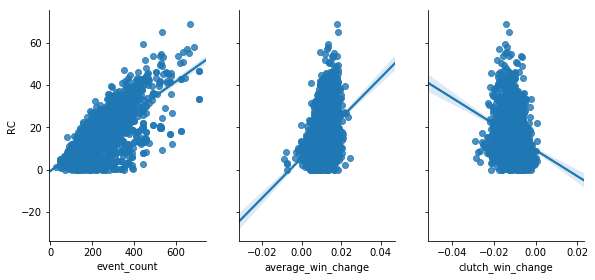

In [8]:
sns.pairplot(dfcat1, x_vars = ['event_count','average_win_change','clutch_win_change'], y_vars = 'RC', height = 4, aspect = 0.7, kind = 'reg')

### Catchers who played at least 100 games

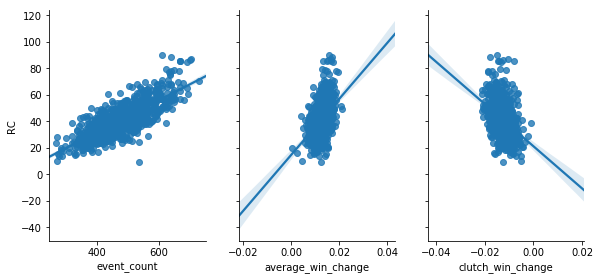

In [12]:
sns.pairplot(dfcat2, x_vars = ['event_count','average_win_change','clutch_win_change'], y_vars = 'RC', height = 4, aspect = 0.7, kind = 'reg')

### All Star Catchers

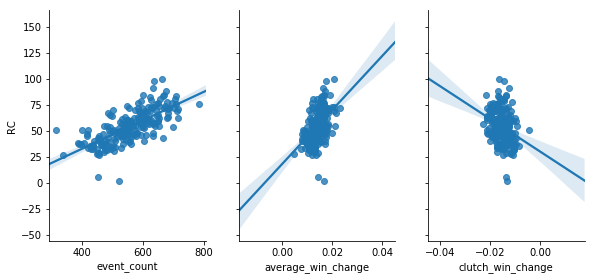

In [16]:
sns.pairplot(dfcat3, x_vars = ['event_count','average_win_change','clutch_win_change'], y_vars = 'RC', height = 4, aspect = 0.7, kind = 'reg')

## Pairplots to view Win Expentancy  vs other features

### Catchers who played at least 30 games

In [35]:
Cat30_Stats_1 = dfcat1[['event_count','average_win_change','clutch_win_change',
                       'AVG','HR','1B','2B','3B']]
Cat30_Stats_1.to_csv('Cat30_Stats_1.csv')

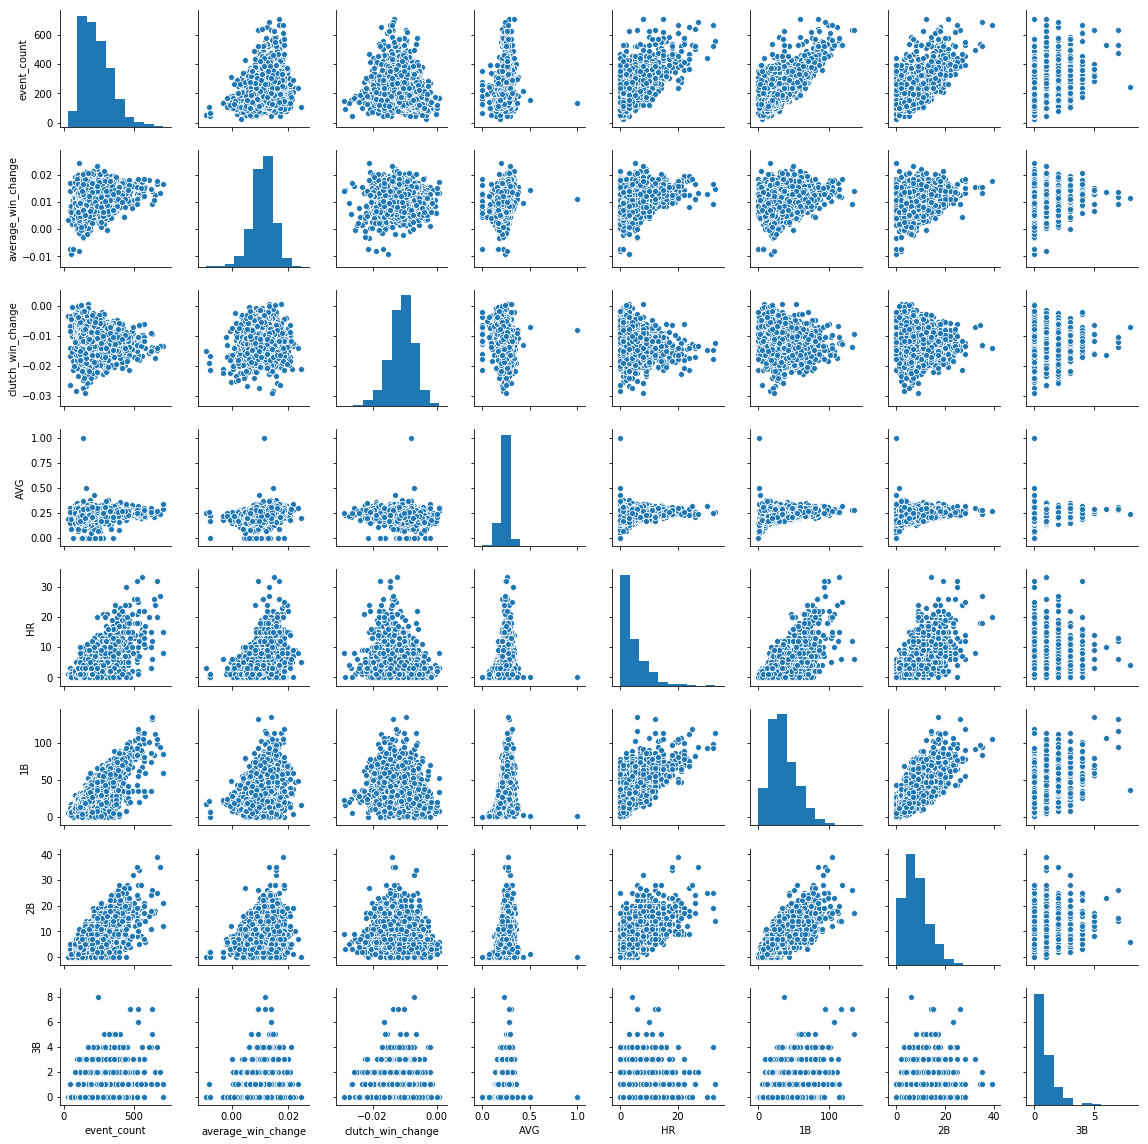

In [40]:
sns.pairplot(Cat30_Stats_1, height= 2)

In [37]:
Cat30_Stats_2 = dfcat1[['event_count','average_win_change','clutch_win_change',
                       'TB','SLG','OPS','OBP','BB']]
Cat30_Stats_2.to_csv('Cat30_Stats_2.csv')

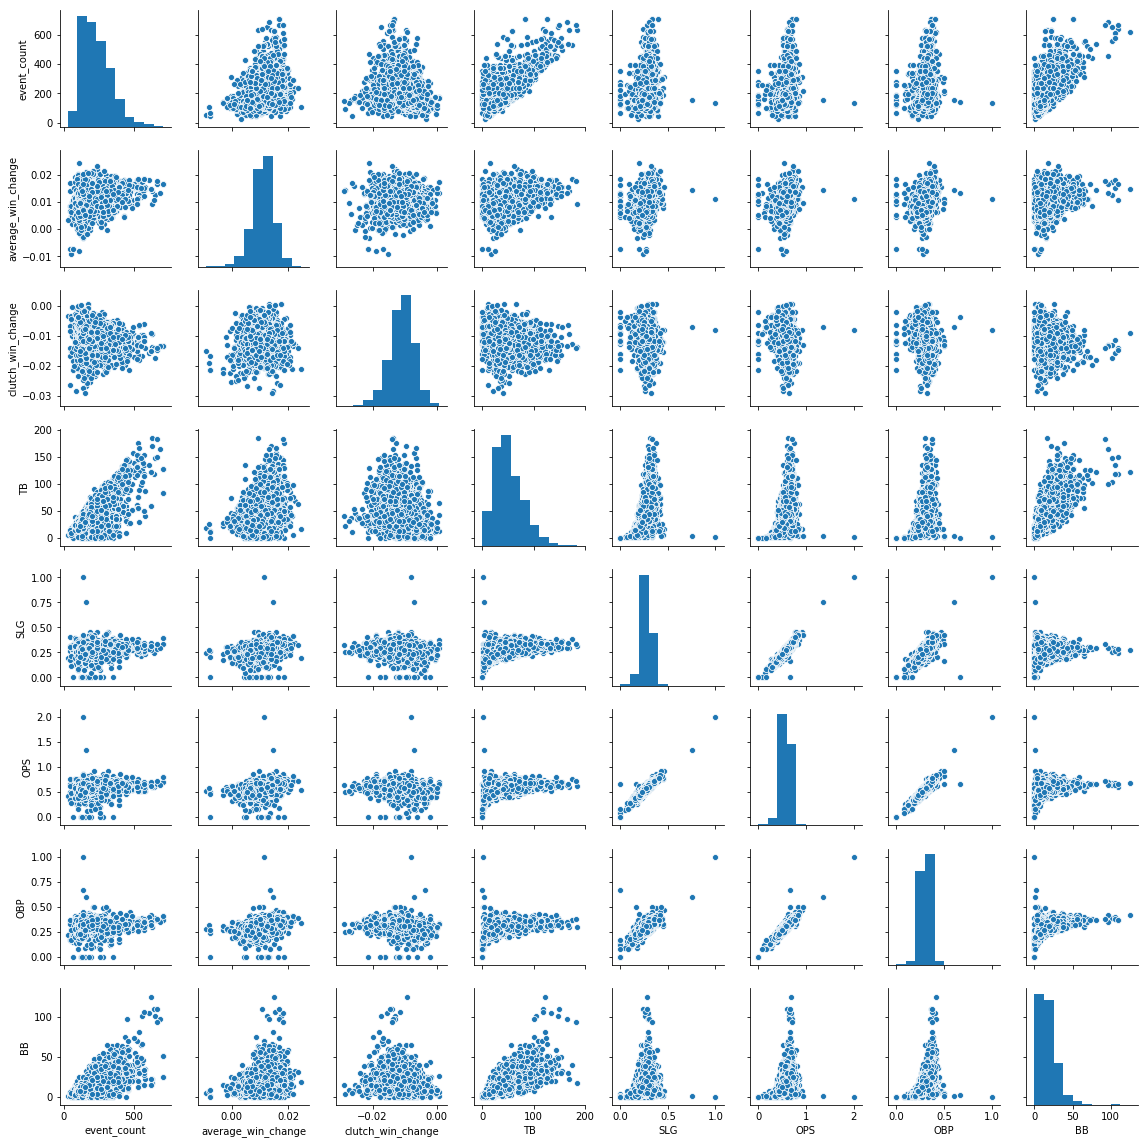

In [41]:
sns.pairplot(Cat30_Stats_2, height= 2)

### Win Expentancy impact on Runs Created

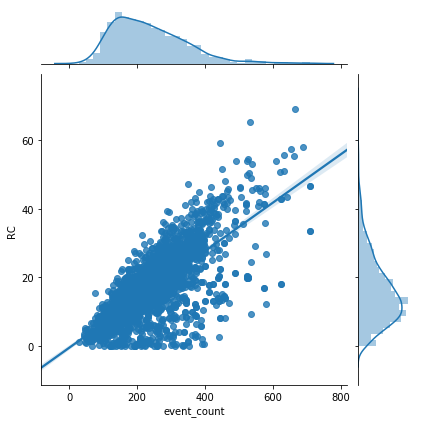

In [42]:
g = sns.jointplot("event_count", "RC", data=dfcat1, kind="reg") 

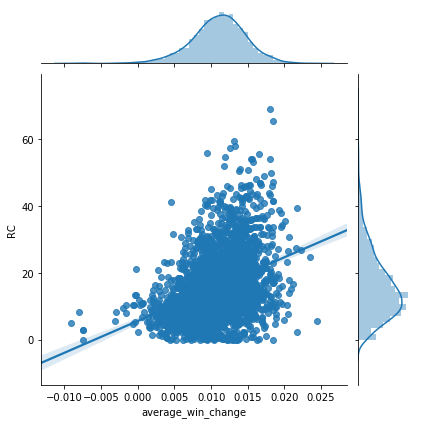

In [44]:
g = sns.jointplot("average_win_change", "RC", data= dfcat1, kind="reg") 

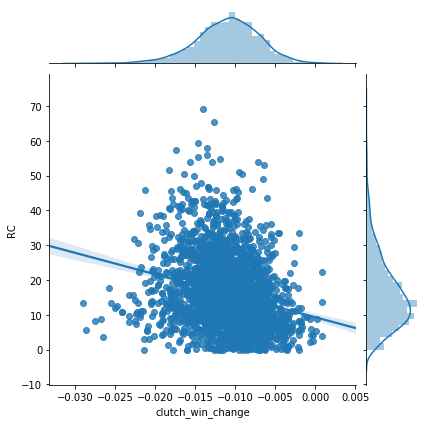

In [15]:
g = sns.jointplot("clutch_win_change", "RC", data=dfcat1, kind="reg") 

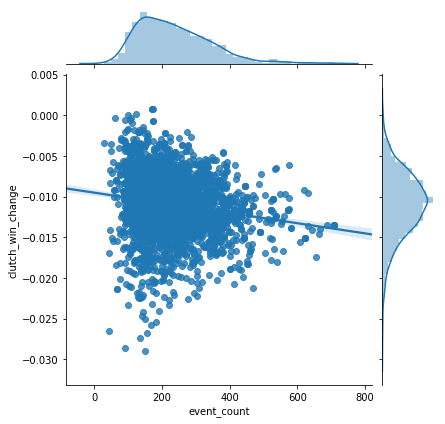

In [16]:
g = sns.jointplot( "event_count","clutch_win_change", data=dfcat1, kind="reg")

### Catchers who played at least 100 games

In [146]:
Cat100_Stats_1 = dfcat2[['event_count','average_win_change','clutch_win_change',
                       'AVG','HR','1B','2B','3B']]
Cat100_Stats_1.to_csv('Cat100_Stats_1.csv')

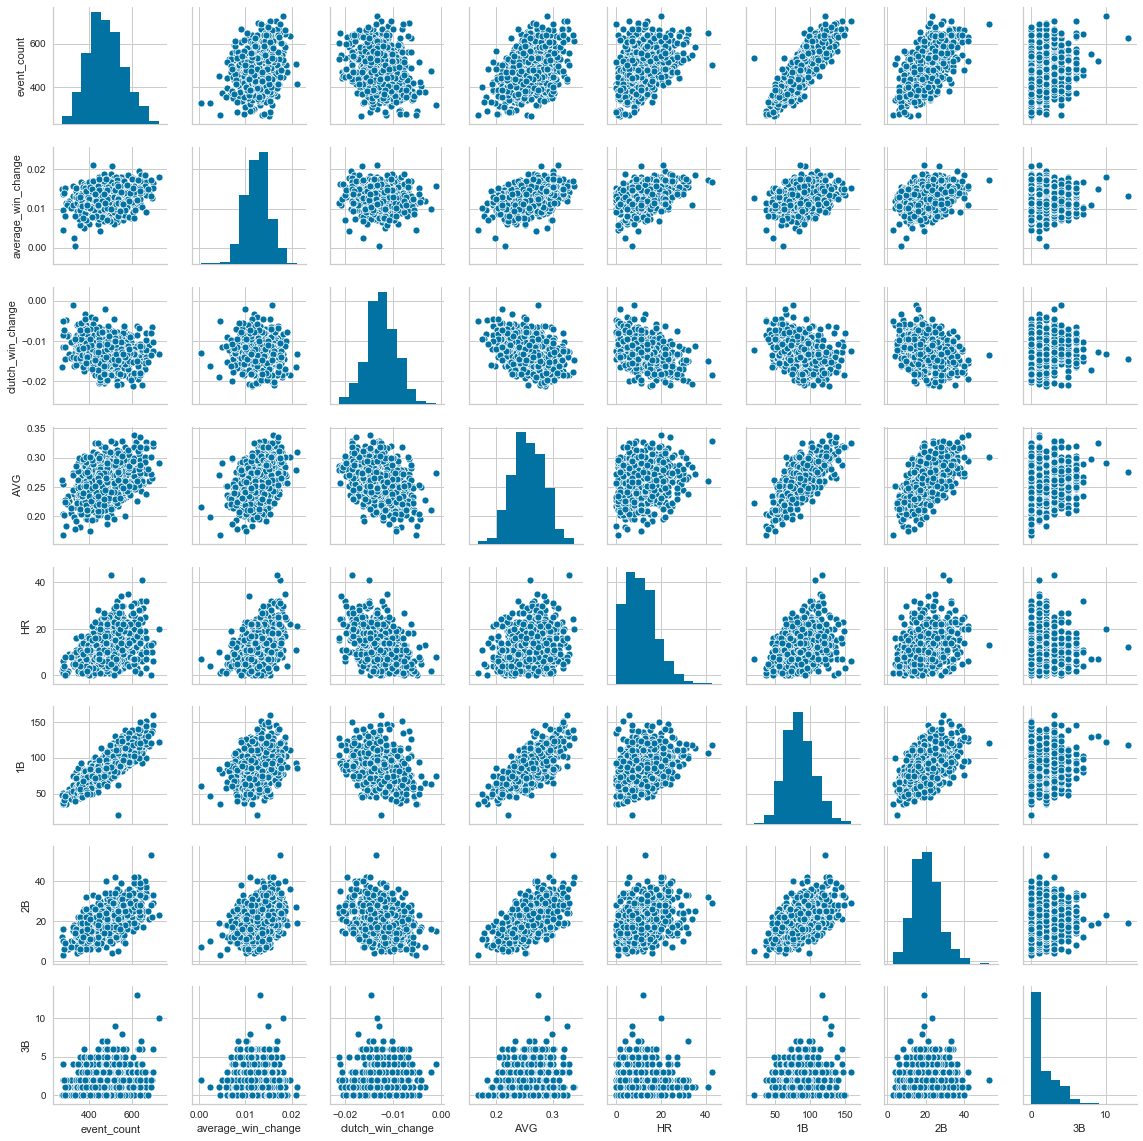

In [147]:
sns.pairplot(Cat100_Stats_1, height= 2)

In [148]:
Cat100_Stats_2 = dfcat2[['event_count','average_win_change','clutch_win_change',
                       'TB','SLG','OPS','OBP','BB']]
Cat100_Stats_2.to_csv('Cat100_Stats_2.csv')

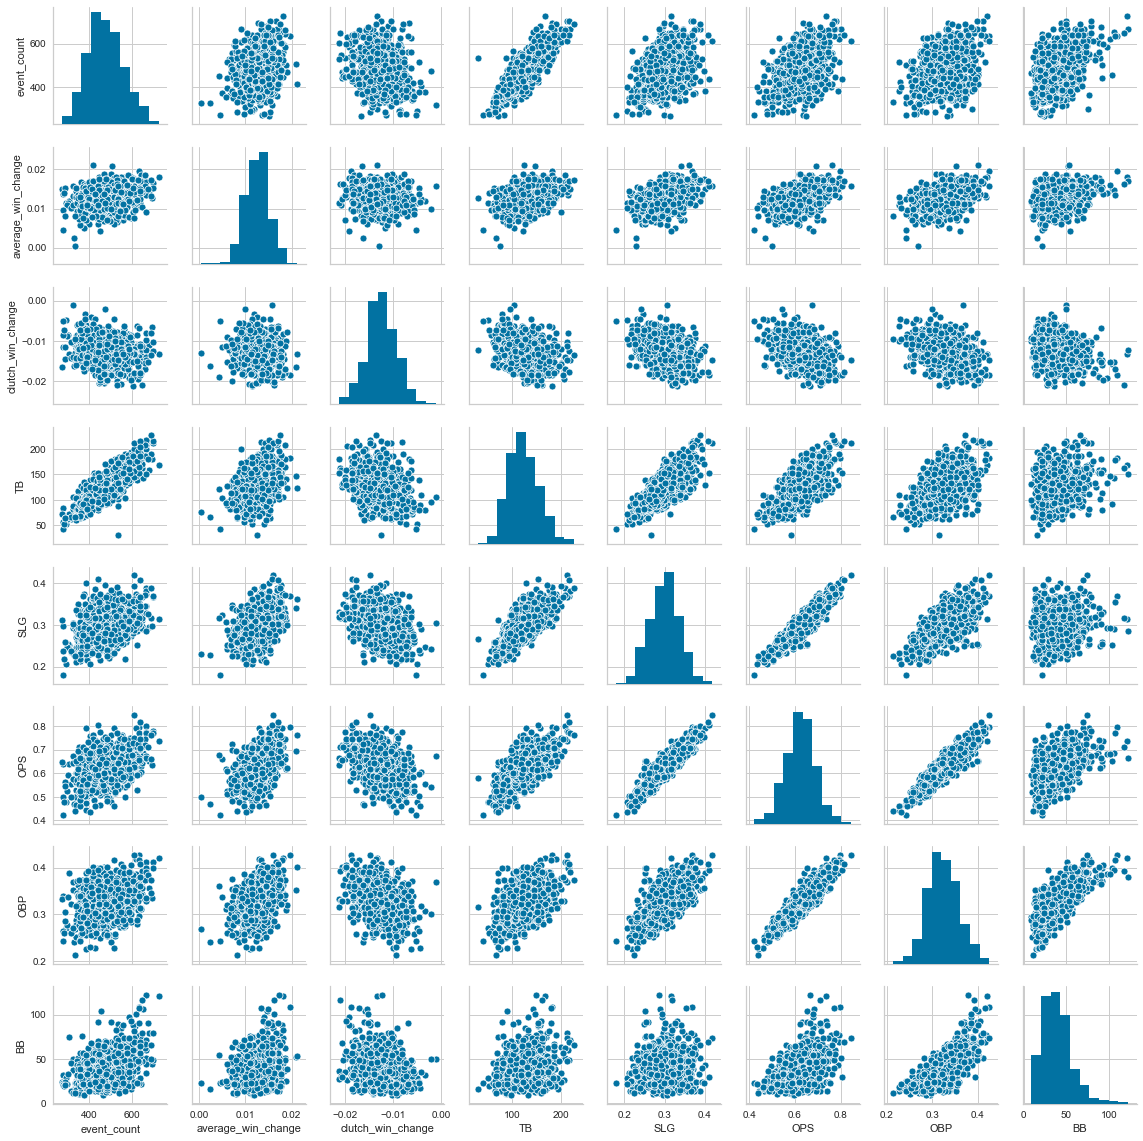

In [149]:
sns.pairplot(Cat100_Stats_2, height= 2)

### Win Expentancy impact on Runs Created

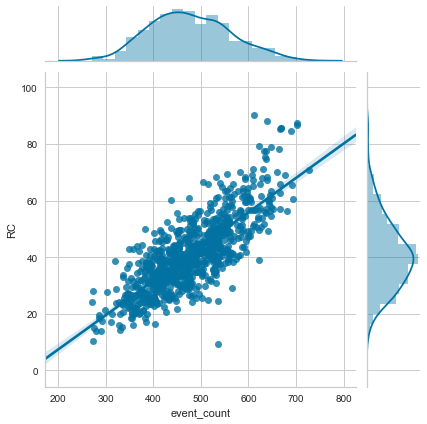

In [150]:
g = sns.jointplot("event_count", "RC", data=dfcat2, kind="reg") 

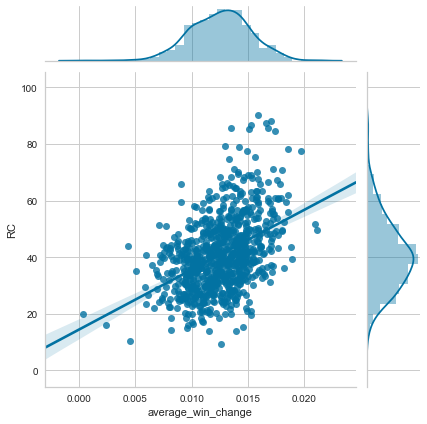

In [151]:
g = sns.jointplot("average_win_change", "RC", data=dfcat2, kind="reg") 

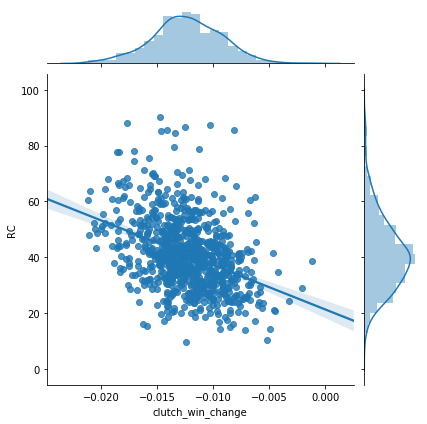

In [12]:
g = sns.jointplot("clutch_win_change", "RC", data=dfcat2, kind="reg") 

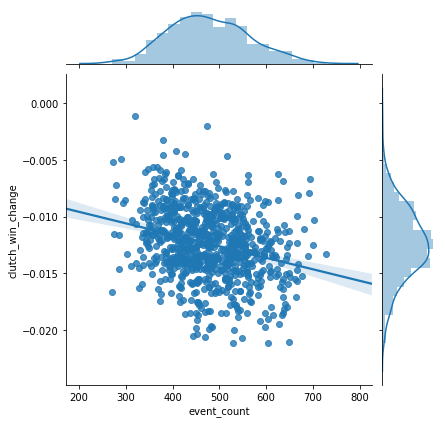

In [17]:
g = sns.jointplot( "event_count","clutch_win_change", data=dfcat2, kind="reg")

### All Star Catchers

In [154]:
Cat_Allstr_Stats_1 = dfcat3[['event_count','average_win_change','clutch_win_change',
                       'AVG','HR','1B','2B','3B']]
Cat_Allstr_Stats_1.to_csv('Cat1_Allstr_Stats_1.csv')

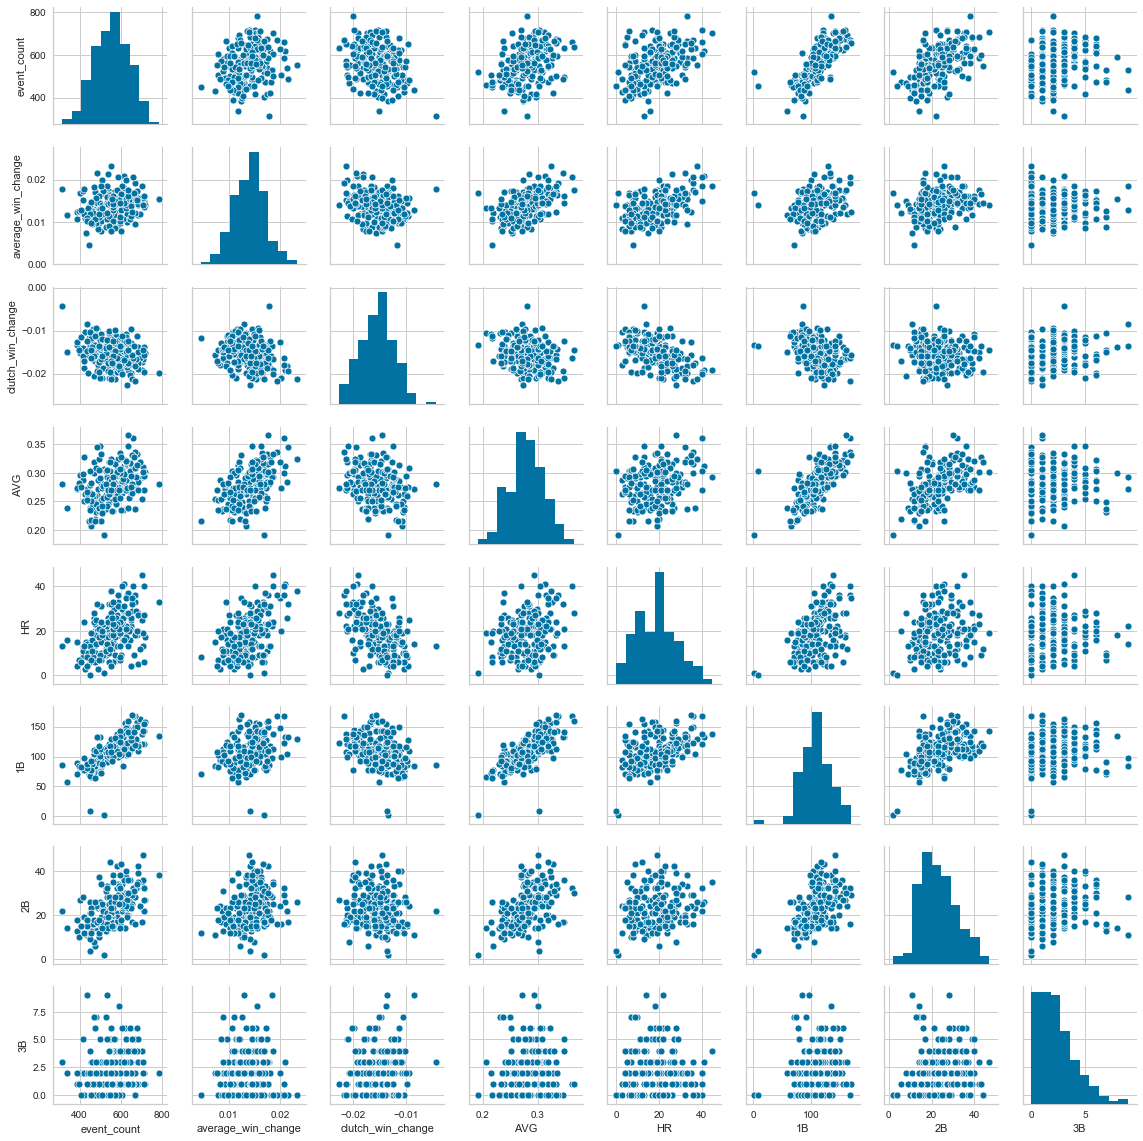

In [155]:
sns.pairplot(Cat_Allstr_Stats_1, height= 2)

In [157]:
Cat_Allstr_Stats_2 = dfcat3[['event_count','average_win_change','clutch_win_change',
                       'TB','SLG','OPS','OBP','BB']]
Cat_Allstr_Stats_2.to_csv('Cat100_Stats_2.csv')

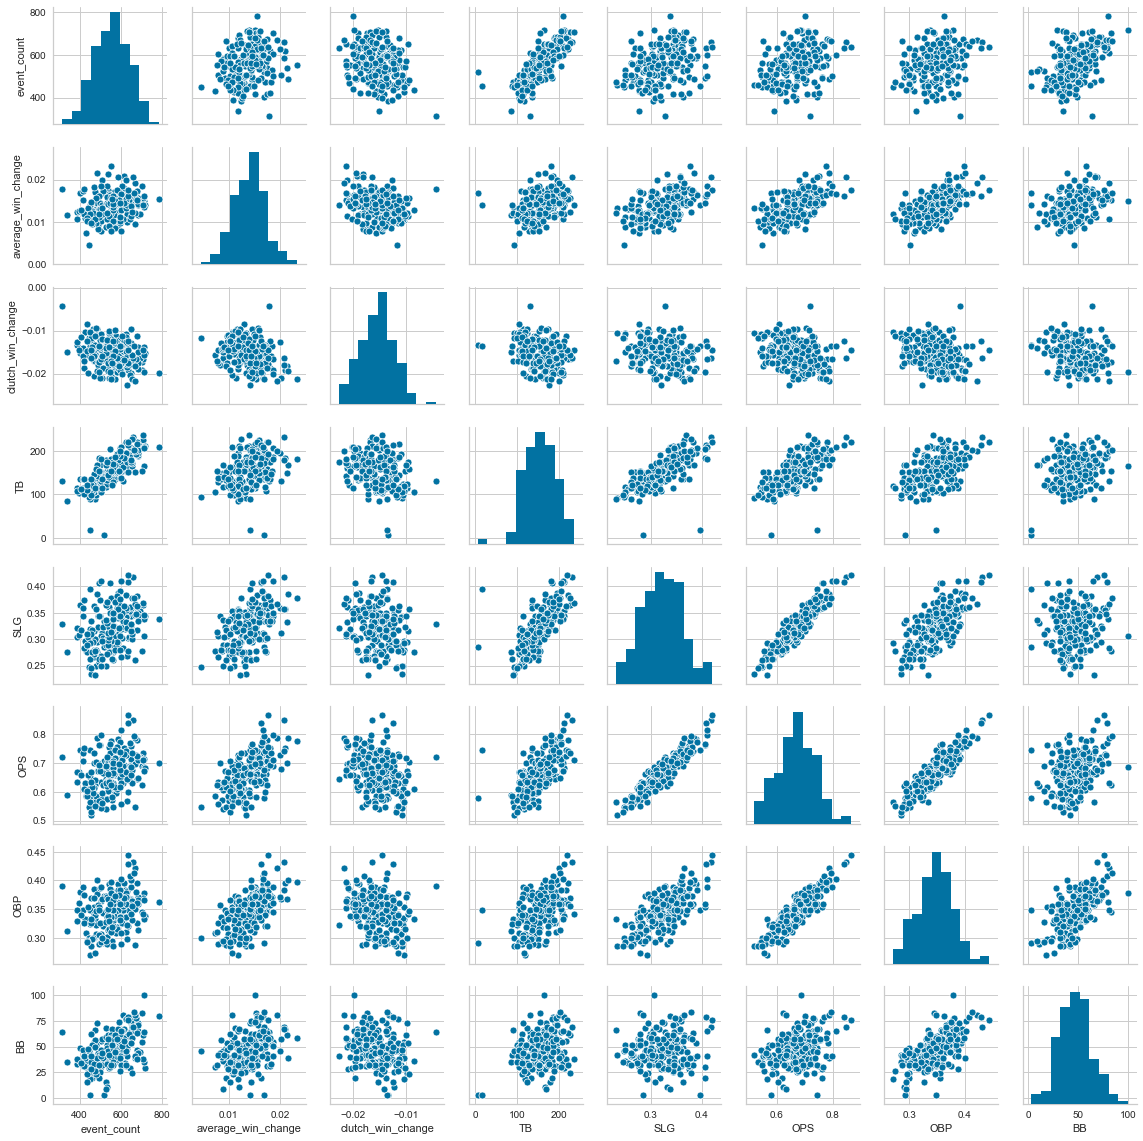

In [158]:
sns.pairplot(Cat_Allstr_Stats_2, height= 2)

### Win Expentancy impact on Runs Created

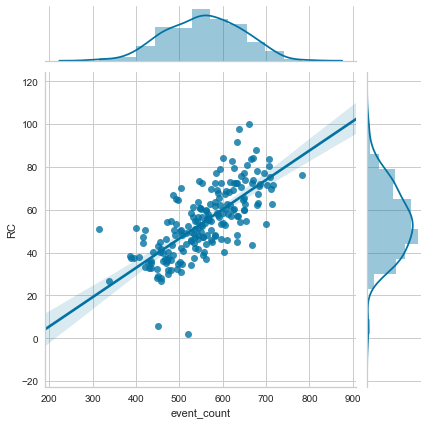

In [159]:
g = sns.jointplot("event_count", "RC", data=dfcat3, kind="reg") 

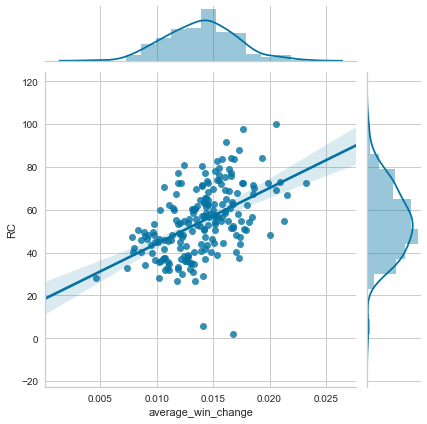

In [160]:
g = sns.jointplot("average_win_change", "RC", data=dfcat3, kind="reg") 

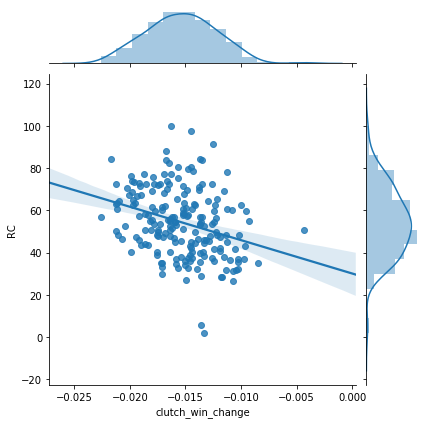

In [13]:
g = sns.jointplot("clutch_win_change", "RC", data=dfcat3, kind="reg") 

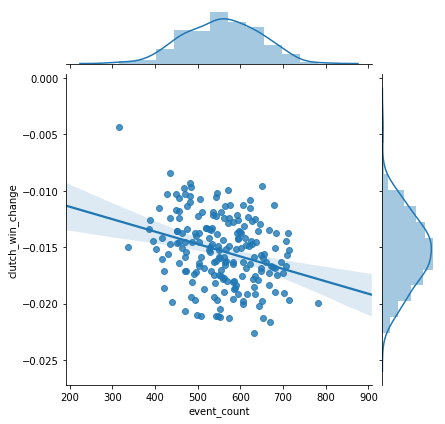

In [19]:
g = sns.jointplot( "event_count","clutch_win_change", data=dfcat3, kind="reg")

## Machine Learning: Can impact on win expectancy predict Runs Created (response)? 

### Catchers who played at least 30 games

#### Create X = features and y = response

In [46]:
#What are the features? - AVG, HR, OPS, SLG, BB, 1B, 2B, 3B, H
#What is the response? - Runs Created

features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfcat1[features]
y = dfcat1['RC']

#### Splitting X and y into training and testing sets

In [47]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [48]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1916, 9)
(639, 9)
(1916,)
(639,)


#### Linear Regression to train Model to learn

In [49]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
### Interpreting model coefficents

#### Making Predictions

In [51]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [52]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [53]:
#Catchers with at least 30 gms
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4256791181747452


In [ ]:
#dfcat1 = 1.42  with all 10 features (Catchers with atleast 30 gms)

### Catchers who played at least 100 games

#### Create X = features and y = response

In [54]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfcat2[features]
y = dfcat2['RC']

#### Splitting X and y into training and testing sets

In [55]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [56]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(624, 9)
(209, 9)
(624,)
(209,)


#### Linear Regression to train Model to learn

In [57]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Making Predictions

In [58]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [59]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [60]:
#Catchers with atleast 100 games
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4982168201680042


### All Star Catchers

#### Create X = features and y = response

In [61]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfcat3[features]
y = dfcat3['RC']

#### Splitting X and y into training and testing sets

In [62]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4 )

In [63]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(147, 9)
(50, 9)
(147,)
(50,)


#### Linear Regression to train Model to learn

In [64]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Making Predictions

In [65]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [66]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [67]:
#All Star Catchers.
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.5821651835537682


## Feature selection - Which are the underperforming features?

### Catchers with atleast 30 games

#### Yellowbrick's Feature Rank Visualizer

In [68]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfcat1[features]
y = ['RC']

In [69]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


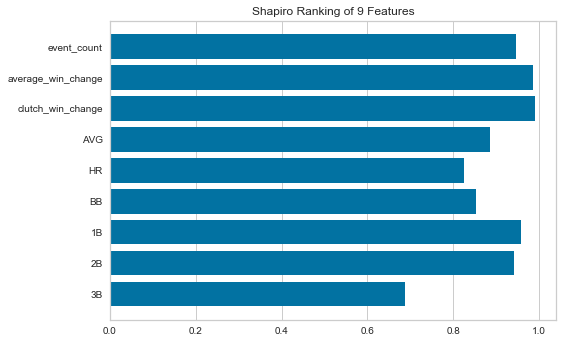

In [70]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [ ]:
# Features [HR, 3B, BB, AVG] ranked the worst

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [71]:
#Outfielders with atleast 30 games
#convert y from float to integer
y = dfcat1.RC.astype(int) 

In [72]:
#Outfielders with atleast 30 games
#set X value for all 10 features
X = dfcat1[features]

In [73]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [74]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

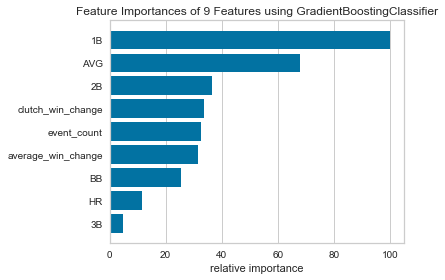

In [75]:
# Infielders with atleast 30 gms
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [76]:
#reset value of y to y = dfin1['RC']
y = dfcat1['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


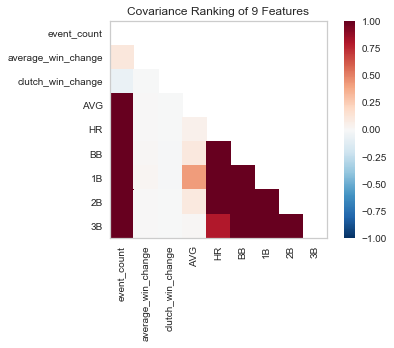

In [77]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

### Catchers with atleast 100 games

#### Yellowbrick's Feature Rank Visualizer

In [78]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfcat2[features]
y = ['RC']

In [79]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


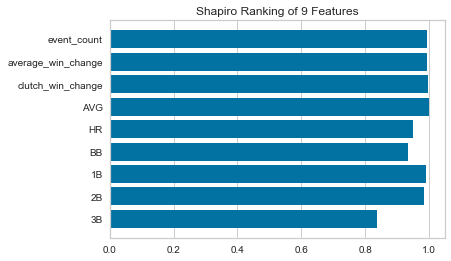

In [80]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [81]:
#Catchers with atleast 100 games
#convert y from float to integer
y = dfcat2.RC.astype(int) 

In [82]:
X = dfcat2[features]

In [83]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [84]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

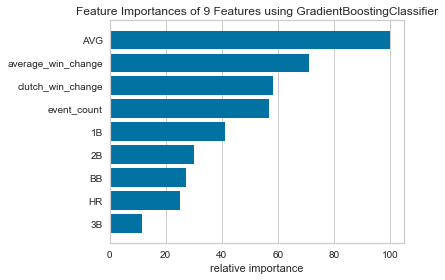

In [85]:
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [86]:
#reset value of y to y = dfcat2['RC']
y = dfcat2['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


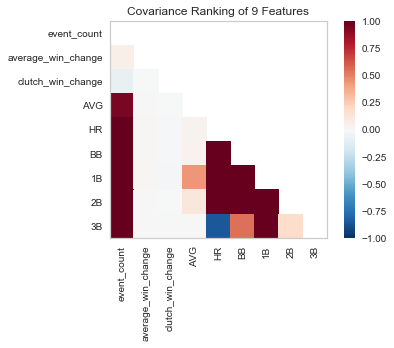

In [87]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

### Allstar Catchers

#### Yellowbrick's Feature Rank Visualizer

In [88]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
X = dfcat3[features]
y = ['RC']

In [89]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


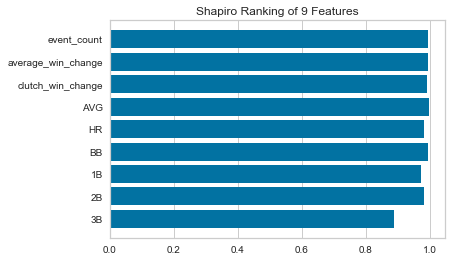

In [90]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [91]:
#convert y from float to integer
y = dfcat3.RC.astype(int) 

In [92]:
X = dfcat3[features]

In [93]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [94]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

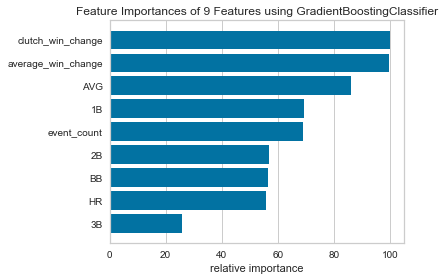

In [95]:
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [96]:
#reset value of y to y = dfcat3['RC']
y = dfcat3['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


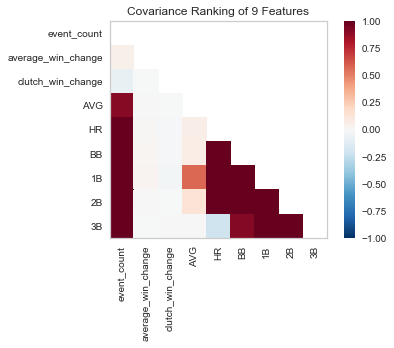

In [97]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Prediction and Error Plotting

### Catchers with atleast 30 games

In [106]:
#Reset X and y values
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
X = dfcat1[features]
y = dfcat1['RC']

#### Ridge Regression - R2 Score

In [107]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [108]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9724744011972778


In [ ]:
#score to high = overfitted. Must remove features and add noise

In [109]:
#removed TB, OPS, OBP, SLG, '2B'
features = ['event_count','average_win_change','clutch_win_change']

In [110]:
X= dfcat1[features]

In [111]:
X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.5935884556815549


#### Lasso Regression -R2 Score

In [89]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [112]:
#Re-set X with only win expectancy features
features = ['event_count','average_win_change','clutch_win_change']
X= dfcat1[features]
y = dfcat1['RC']

In [113]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.5935884556815549


## Data Visualization

### Outfielders with at least 30 gms

#### Visualize Plot Error

In [114]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfcat1
features = features = ['event_count','average_win_change','clutch_win_change']
X = dfcat1[features]
y = dfcat1['RC']


In [115]:
#Create the train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

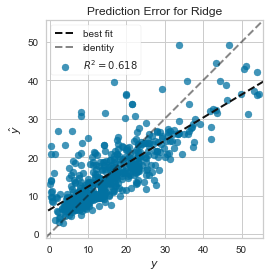

In [116]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

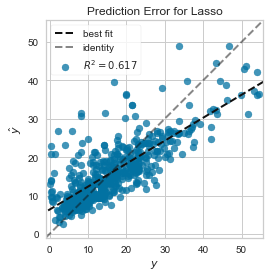

In [117]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

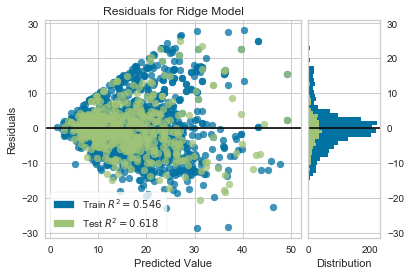

In [118]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Resdiual Plots

In [119]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

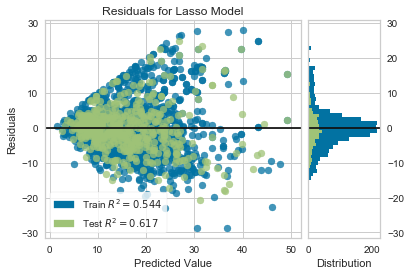

In [120]:
Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

## Prediction and Error Plotting

### Catchers with atleast 100 games

In [121]:
#Reset X and y values
features = features = ['event_count','average_win_change','clutch_win_change']
X = dfcat2[features]
y = dfcat2['RC']

#### Ridge Regression -R2 Score

In [122]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [123]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.5356384414550004


#### Lasso Regression -R2 Score

In [124]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [125]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.5356384414550004


## Data Visualization

### Catchers with at least 100 gms

#### Visualize Plot Error

In [126]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfcat2
features = features = ['event_count','average_win_change','clutch_win_change']
X = dfcat2[features]
y = dfcat2['RC']

In [127]:
#Create and train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

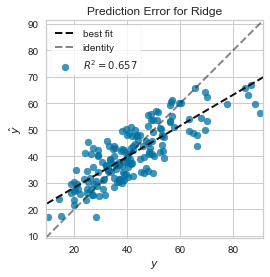

In [128]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

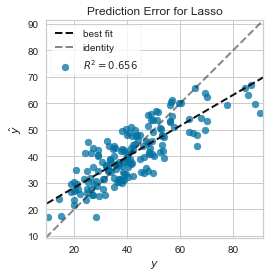

In [129]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

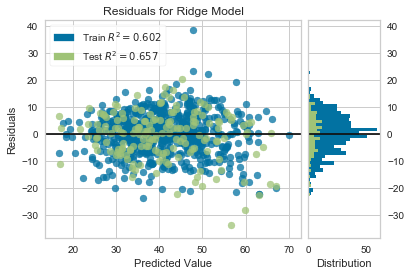

In [130]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Residual Plots

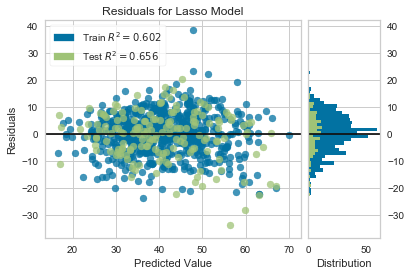

In [131]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

## Prediction and Error Plotting

### All Star Outfielders 

In [132]:
#Reset X and y values
features = ['event_count','average_win_change','clutch_win_change']
X = dfcat3[features]
y = dfcat3['RC']

#### Ridge Regression - R2 Score

In [133]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [134]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.49853319911198557


#### Lasso Regression -R2 Score

In [135]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [136]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.49853319911198557


## Data Visualization

### All Star Outfielders 

#### Visualize Plot Error

In [140]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfcat3
features = ['event_count','average_win_change','clutch_win_change']
X = dfcat3[features]
y = dfcat3['RC']

In [141]:
#Create and train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

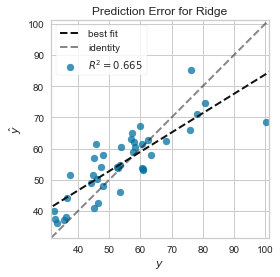

In [142]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

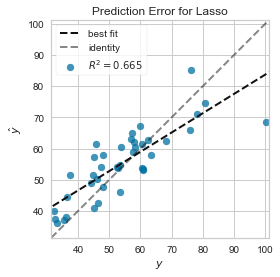

In [143]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

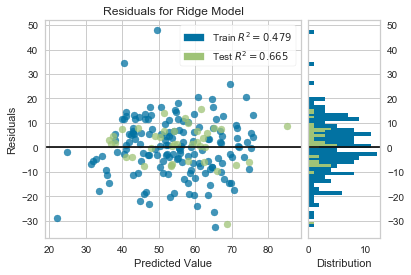

In [144]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Residual Plots

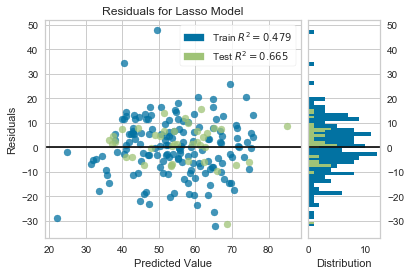

In [145]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()